<a href="https://colab.research.google.com/github/tcruz88/CNN_project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
!unzip cats.zip
!unzip dogs.zip

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import os
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


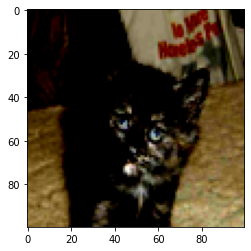

[1. 0.]
[[[ 0.02745098 -0.19215686 -0.56862745]
  [ 0.00392157 -0.21568627 -0.59215686]
  [-0.0745098  -0.29411765 -0.67058824]
  ...
  [-0.34901961 -0.49803922 -0.63921569]
  [-0.39607843 -0.52941176 -0.6627451 ]
  [-0.41960784 -0.52156863 -0.69411765]]

 [[ 0.04313725 -0.16862745 -0.58431373]
  [ 0.01176471 -0.20784314 -0.61568627]
  [-0.0745098  -0.28627451 -0.70196078]
  ...
  [-0.33333333 -0.49803922 -0.68627451]
  [-0.39607843 -0.52941176 -0.69411765]
  [-0.41960784 -0.5372549  -0.69411765]]

 [[-0.02745098 -0.23921569 -0.67058824]
  [-0.05098039 -0.2627451  -0.68627451]
  [-0.06666667 -0.27843137 -0.70196078]
  ...
  [-0.29411765 -0.45882353 -0.7254902 ]
  [-0.34117647 -0.49019608 -0.70196078]
  [-0.38823529 -0.55294118 -0.68627451]]

 ...

 [[ 0.57647059  0.46666667  0.23921569]
  [ 0.63137255  0.52156863  0.29411765]
  [ 0.61568627  0.50588235  0.27843137]
  ...
  [ 0.71764706  0.6         0.41960784]
  [ 0.65490196  0.60784314  0.41960784]
  [ 0.65490196  0.61568627  0.427450

In [3]:
#image data shape (n, width, height, rgb value)

X = [] # Images
Y = [] # Categories

folder_pedestrian = 'cats'
folder_road = 'dogs'

name_encode = {"pedestrian":0, "road":1}

def images_to_array(folder, name):
    for image in os.listdir(folder):
        loaded_image = Image.open(os.path.join(folder, image))  #loading image
        resized_image = Image.Image.resize(loaded_image, [100,100]) #resize image to 100 x 100 px
        image_array = np.array(resized_image) # transform image into an array
        X.append(image_array) # append images to array X
        Y.append(name_encode[name]) #append category

        # image_flipped = cv2.flip(image_array,1) #create copies of images flipped horizontally to improve model accuracy
        # X.append(image_flipped)
        # Y.append(name_encode[name])

        # image_blurred = cv2.blur(image_array,(2,2)) #create copies of images blurred to improve accuracy
        # X.append(image_blurred)
        # Y.append(name_encode[name])

        # image_flipped_blurred = cv2.blur(image_flipped,(2,2)) #create copies of images flipped horizontally & blurred to improve accuracy
        # X.append(image_flipped_blurred)
        # Y.append(name_encode[name])

def show_image(index):
    plt.imshow(X[index])
    plt.show()
    print(Y[index])

images_to_array(folder_pedestrian, "pedestrian")
images_to_array(folder_road, "road")

Y = to_categorical(Y, num_classes=2)
X = (np.array(X) - 127.5) / 127.5 #normalization of data

show_image(10)
print(X[10])

In [4]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D, BatchNormalization, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (5,5), padding='same',activation='relu', input_shape=(100,100,3) ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5)) # muting half of trainable parameters
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5)) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 100)       80100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 50, 50, 100)       400       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 100)       0

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

print(X[10])

[[[ 0.02745098 -0.19215686 -0.56862745]
  [ 0.00392157 -0.21568627 -0.59215686]
  [-0.0745098  -0.29411765 -0.67058824]
  ...
  [-0.34901961 -0.49803922 -0.63921569]
  [-0.39607843 -0.52941176 -0.6627451 ]
  [-0.41960784 -0.52156863 -0.69411765]]

 [[ 0.04313725 -0.16862745 -0.58431373]
  [ 0.01176471 -0.20784314 -0.61568627]
  [-0.0745098  -0.28627451 -0.70196078]
  ...
  [-0.33333333 -0.49803922 -0.68627451]
  [-0.39607843 -0.52941176 -0.69411765]
  [-0.41960784 -0.5372549  -0.69411765]]

 [[-0.02745098 -0.23921569 -0.67058824]
  [-0.05098039 -0.2627451  -0.68627451]
  [-0.06666667 -0.27843137 -0.70196078]
  ...
  [-0.29411765 -0.45882353 -0.7254902 ]
  [-0.34117647 -0.49019608 -0.70196078]
  [-0.38823529 -0.55294118 -0.68627451]]

 ...

 [[ 0.57647059  0.46666667  0.23921569]
  [ 0.63137255  0.52156863  0.29411765]
  [ 0.61568627  0.50588235  0.27843137]
  ...
  [ 0.71764706  0.6         0.41960784]
  [ 0.65490196  0.60784314  0.41960784]
  [ 0.65490196  0.61568627  0.42745098]]

 [

Epoch 1/10
57/57 [==============================] - 431s 8s/step - loss: 2.1309 - acc: 0.5298 - val_loss: 0.6983 - val_acc: 0.5050
Epoch 2/10
57/57 [==============================] - 429s 8s/step - loss: 0.6529 - acc: 0.6467 - val_loss: 0.6932 - val_acc: 0.5025
Epoch 3/10
57/57 [==============================] - 428s 8s/step - loss: 0.5991 - acc: 0.6875 - val_loss: 1.4019 - val_acc: 0.5163
Epoch 4/10
57/57 [==============================] - 427s 7s/step - loss: 0.5213 - acc: 0.7280 - val_loss: 1.2807 - val_acc: 0.5400
Epoch 5/10
57/57 [==============================] - 427s 7s/step - loss: 0.4675 - acc: 0.7717 - val_loss: 2.6756 - val_acc: 0.5150
Epoch 6/10
57/57 [==============================] - 427s 7s/step - loss: 0.4372 - acc: 0.7958 - val_loss: 2.8360 - val_acc: 0.5275
Epoch 7/10
57/57 [==============================] - 427s 7s/step - loss: 0.3739 - acc: 0.8288 - val_loss: 1.9135 - val_acc: 0.6037
Epoch 8/10
57/57 [==============================] - 427s 7s/step - loss: 0.3386 - a

Text(0, 0.5, 'Accuracy')

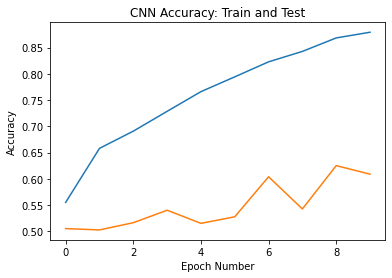

In [6]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])
h = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test,y_test))
model.save('catdog_CNN.h5')

plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.title("CNN Accuracy: Train and Test")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
4635
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
3994
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
2975
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
7468
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
932
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: CAT
3880
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
6412
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
7328
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
4755
Prediction: CAT


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Actual: DOG
5869
Prediction: CAT


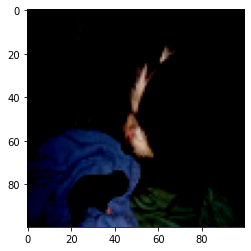

In [11]:
from keras.models import load_model

model = load_model('catdog_CNN.h5')

def prediction(index_number):
  img = np.array(X[index_number]) 
  img = img.reshape(1,100,100,3) # (n number of images, h, w, rgb)
  prediction = model.predict_classes(img)
  if prediction == 0:
    print('Prediction: CAT')
  elif prediction == 1:
    print('Prediction: DOG')
  else:
    print('Prediction: Error')
  plt.imshow(X[index_number])
  plt.show

import random
import time

for i in range(10):
     rand = random.randrange(0,7999)
     if rand < 4000:
        print('Actual: CAT')
     else:
        print('Actual: DOG')
     print(rand)
     prediction(rand)
     time.sleep(1) 

# Cat: 0 - 3999
# Dog: 4000 - 7999
# Pedestrian = cat or 0, Road = dog or 1